Running AlievPanfilov3D: 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]


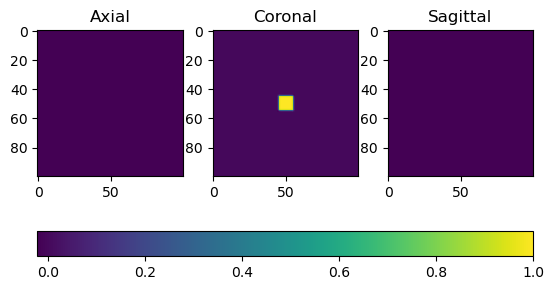

In [1]:

import matplotlib.pyplot as plt
import numpy as np

import finitewave as fw

# number of nodes on the side
n = 100
m = 3

tissue = fw.CardiacTissue3D((n, n, m))
# create a mesh of cardiomyocytes (elems = 1):
tissue.mesh = np.ones([n, n, m])
tissue.add_boundaries()
# add fibers orientation vectors
theta, alpha = 0. * np.pi, 1 * np.pi/4
tissue.fibers = np.zeros((3, n, n, m))
tissue.fibers[0] = np.cos(theta) * np.cos(alpha)
tissue.fibers[1] = np.cos(theta) * np.sin(alpha)
tissue.fibers[2] = np.sin(theta)
# add numeric method stencil for weights computations
tissue.stencil = fw.AsymmetricStencil3D()
tissue.D_al = 1
tissue.D_ac = tissue.D_al/9

# create model object:
aliev_panfilov = fw.AlievPanfilov3D()
# set up numerical parameters:
aliev_panfilov.dt = 0.001
aliev_panfilov.dr = 0.1
aliev_panfilov.t_max = 0.001
# set up stimulation parameters:
stim_sequence = fw.StimSequence()
stim_sequence.add_stim(fw.StimVoltageCoord3D(0, 1, n//2 - 5, n//2 + 5,
                                             n//2 - 5, n//2 + 5,
                                             1, 2))
# add the tissue and the stim parameters to the model object:
aliev_panfilov.cardiac_tissue = tissue
aliev_panfilov.stim_sequence = stim_sequence
aliev_panfilov.run()

import skimage as ski

labeled = (aliev_panfilov.u[:, :, 1] > 0.5).astype(int)
props = ski.measure.regionprops_table(labeled, properties=(
    'orientation', 'major_axis_length', 'minor_axis_length'))
props['orientation'] = np.degrees(props['orientation'])
props['axis_ratio'] = props['major_axis_length'] / props['minor_axis_length']
props['alpha'] = np.degrees(alpha)
props['density_calc'] = (np.sum(tissue.mesh[-1:1, -1:1] == 2) 
                            / ((n - 2) * (n - 2)))
# print(props)

# show the potential map in axial, coronal and sagittal planes:
fig, axs = plt.subplots(1, 3)
im_x = axs[0].imshow(aliev_panfilov.u[:, :, 0])
im_y = axs[1].imshow(aliev_panfilov.u[:, :, 1])
im_z = axs[2].imshow(aliev_panfilov.u[:, :, 2])
axs[0].set_title('Axial')
axs[1].set_title('Coronal')
axs[2].set_title('Sagittal')
fig.colorbar(im_y, ax=axs, orientation='horizontal')
plt.show()

In [2]:
tissue.weights[50, 50, 1, :]

array([ 0.02222222,  0.05555556, -0.02222222,  0.05555556,  0.77777779,
        0.05555556, -0.02222222,  0.05555556,  0.02222222,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ])

In [ ]:
array([ 0.02222222,  0.05555556, -0.02222222,  0.05555556,  0.77777778,
        0.05555556, -0.02222222,  0.05555556,  0.02222222])

Running AlievPanfilov3D: 100%|██████████| 10000/10000 [00:58<00:00, 169.81it/s]


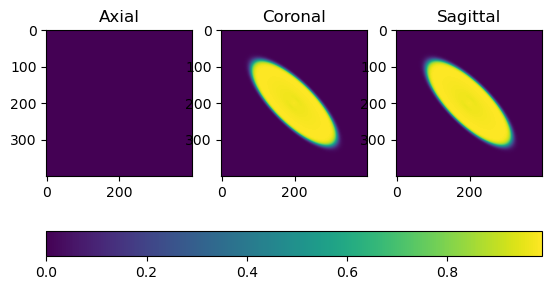

In [ ]:


import matplotlib.pyplot as plt
import numpy as np

import finitewave as fw

# number of nodes on the side
n = 100
m = 100
k = 100

tissue = fw.CardiacTissue3D((n, m, k))
# create a mesh of cardiomyocytes (elems = 1):
tissue.mesh = np.ones([n, m, k])
tissue.add_boundaries()
# add fibers orientation vectors
theta, alpha = 0. * np.pi, 0.25 * np.pi
tissue.fibers = np.zeros((3, n, m, k))
tissue.fibers[0] = np.cos(theta) * np.cos(alpha)
tissue.fibers[1] = np.cos(theta) * np.sin(alpha)
tissue.fibers[2] = np.sin(theta)
# add numeric method stencil for weights computations
tissue.stencil = fw.AsymmetricStencil3D()
tissue.D_al = 1
tissue.D_ac = tissue.D_al/9

# create model object:
aliev_panfilov = fw.AlievPanfilov3D()
# set up numerical parameters:
aliev_panfilov.dt = 0.001
aliev_panfilov.dr = 0.1
aliev_panfilov.t_max = 10
# set up stimulation parameters:
stim_sequence = fw.StimSequence()
stim_sequence.add_stim(fw.StimVoltageCoord3D(0, 1, n//2 - 5, n//2 + 5,
                                             m//2 - 5, m//2 + 5,
                                             k//2 - 5, k//2 + 5))
# add the tissue and the stim parameters to the model object:
aliev_panfilov.cardiac_tissue = tissue
aliev_panfilov.stim_sequence = stim_sequence
aliev_panfilov.run()


# show the potential map in axial, coronal and sagittal planes:
fig, axs = plt.subplots(1, 3)
im_x = axs[0].imshow(aliev_panfilov.u[:, :, 0])
im_y = axs[1].imshow(aliev_panfilov.u[:, :, 1])
im_z = axs[2].imshow(aliev_panfilov.u[:, :, 2])
axs[0].set_title('Axial')
axs[1].set_title('Coronal')
axs[2].set_title('Sagittal')
fig.colorbar(im_y, ax=axs, orientation='horizontal')
plt.show()